<a href="https://colab.research.google.com/github/harshalzalke/THA_2/blob/master/THA_1_Harshal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment Description**

My research question is to explore the correlation between the economic freedom, happiness and inflation for a country. I have limited my analysis to the year of 2016.  In order to do that, I have retrieved the data for the three factors  for the year 2016, and have merged them to create a single dataset I can then analyze. The data that I have used is as follows:
 
 a) The Happiness data: **The codebook is titled hap_final**. The data is retrieved from the World Happiness Report (**source**: https://s3.amazonaws.com/happiness-report/2016/Online-data-for-chapter-2-whr-2016.xlsx). **The data format is xlsx.**
 
 b) Economic Freddon data: **The codebook is titled eco_free_f**. The data is retrieved from the Fraser Institute.
 **source**: https://www.fraserinstitute.org/sites/default/files/efw-2018-master-index-data-for-researchers.xlsx. **The data format is xlsx.**
 
 c) Consumer Price Inflation: **The codebook is titled Inflation**. I retreived this data from the world bank open source datasets (**source**: https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?locations=BR). Since the link to the data was an API, I had trouble improting the data through an API. Hence, I had to download the data and then edit it to **create the required codebook (file name: Inflation.xlsx)**. **The formalt is xlsx.**
 
 The final merged file is titled: **final_data**.
 
 Finally, I plotted economic freedom vs happiness score to get an idea of there is any correlation.

In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt

In [0]:
import numpy as np

In [0]:
#Importing world happiness data. Link (https://s3.amazonaws.com/happiness-report/2016/Online-data-for-chapter-2-whr-2016.xlsx)
hap1 = pd.ExcelFile("https://s3.amazonaws.com/happiness-report/2016/Online-data-for-chapter-2-whr-2016.xlsx")

In [0]:
print(hap1)

In [0]:
hap1.sheet_names

['Data for Table2.1',
 'Figure 2.1',
 'Figure2.2',
 'Figure2.3',
 'Figure 2.4',
 'Figure 2.5',
 'Figure 2.6',
 'Figure 2.7']

In [0]:
#saving only the required sheet. "Figure2.2" contains the happiness score.
hap = hap1.parse("Figure2.2")

In [0]:
#making the first row as headers
print(hap)

                  Country  Happiness score  Whisker-high  Whisker-low  \
0                 Denmark            7.526      7.591507     7.460493   
1             Switzerland            7.509      7.589791     7.428208   
2                 Iceland            7.501      7.669368     7.332632   
3                  Norway            7.498      7.574923     7.421077   
4                 Finland            7.413      7.474935     7.351065   
5                  Canada            7.404      7.472630     7.335370   
6             Netherlands            7.339      7.393850     7.284150   
7             New Zealand            7.334      7.403604     7.264396   
8               Australia            7.313      7.385071     7.240929   
9                  Sweden            7.291      7.354515     7.227484   
10                 Israel            7.267      7.335185     7.198815   
11                Austria            7.119      7.192645     7.045355   
12          United States            7.104      7.1

In [0]:
hap_final = hap.iloc[:,0:2]
print(hap_final)

                  Country  Happiness score
0                 Denmark            7.526
1             Switzerland            7.509
2                 Iceland            7.501
3                  Norway            7.498
4                 Finland            7.413
5                  Canada            7.404
6             Netherlands            7.339
7             New Zealand            7.334
8               Australia            7.313
9                  Sweden            7.291
10                 Israel            7.267
11                Austria            7.119
12          United States            7.104
13             Costa Rica            7.087
14            Puerto Rico            7.039
15                Germany            6.994
16                 Brazil            6.952
17                Belgium            6.929
18                Ireland            6.907
19             Luxembourg            6.871
20                 Mexico            6.778
21              Singapore            6.739
22         

In [0]:
#getting data for economic freedom
eco_free1 = pd.ExcelFile("https://www.fraserinstitute.org/sites/default/files/efw-2018-master-index-data-for-researchers.xlsx")

In [0]:
eco_free1.sheet_names

['EFW Index 2018 Report', 'EFW Panel Data 2018 Report', 'EFW 1950-1965']

In [0]:
eco_free = eco_free1.parse("EFW Index 2018 Report")

In [0]:
print(eco_free)
print(eco_free.columns)

      Unnamed: 0 Unnamed: 1 Unnamed: 2              Unnamed: 3     Unnamed: 4  \
0            NaN        NaN        NaN                     NaN            NaN   
1            NaN        NaN        NaN                     NaN            NaN   
2            NaN       Year   ISO_Code               Countries  SUMMARY INDEX   
3            NaN       2016        ALB                 Albania           7.54   
4            NaN       2016        DZA                 Algeria           4.99   
5            NaN       2016        AGO                  Angola           5.17   
6            NaN       2016        ARG               Argentina           4.84   
7            NaN       2016        ARM                 Armenia           7.57   
8            NaN       2016        AUS               Australia           7.98   
9            NaN       2016        AUT                 Austria           7.58   
10           NaN       2016        AZE              Azerbaijan           6.49   
11           NaN       2016 

In [0]:
eco_free2 = eco_free.head(165)

In [0]:
eco_free3 = eco_free2.tail(163)

In [0]:
print(eco_free3)

     Unnamed: 0 Unnamed: 1 Unnamed: 2              Unnamed: 3     Unnamed: 4  \
2           NaN       Year   ISO_Code               Countries  SUMMARY INDEX   
3           NaN       2016        ALB                 Albania           7.54   
4           NaN       2016        DZA                 Algeria           4.99   
5           NaN       2016        AGO                  Angola           5.17   
6           NaN       2016        ARG               Argentina           4.84   
7           NaN       2016        ARM                 Armenia           7.57   
8           NaN       2016        AUS               Australia           7.98   
9           NaN       2016        AUT                 Austria           7.58   
10          NaN       2016        AZE              Azerbaijan           6.49   
11          NaN       2016        BHS                 Bahamas           7.34   
12          NaN       2016        BHR                 Bahrain           7.56   
13          NaN       2016        BGD   

In [0]:
print(eco_free3.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Area 1', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Area 2', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Area 3', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Area 4', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Area 5', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
      

In [0]:
#transforming the first row into headers
headers = eco_free3.iloc[0]
eco_free4 = pd.DataFrame(eco_free3.values[1:], columns = headers)

In [0]:
print(eco_free4)

2    NaN  Year ISO_Code               Countries SUMMARY INDEX Rank Quartile  \
0    NaN  2016      ALB                 Albania          7.54   34        1   
1    NaN  2016      DZA                 Algeria          4.99  159        4   
2    NaN  2016      AGO                  Angola          5.17  155        4   
3    NaN  2016      ARG               Argentina          4.84  160        4   
4    NaN  2016      ARM                 Armenia          7.57   29        1   
5    NaN  2016      AUS               Australia          7.98   10        1   
6    NaN  2016      AUT                 Austria          7.58   27        1   
7    NaN  2016      AZE              Azerbaijan          6.49  105        3   
8    NaN  2016      BHS                 Bahamas          7.34   49        2   
9    NaN  2016      BHR                 Bahrain          7.56   30        1   
10   NaN  2016      BGD              Bangladesh           6.3  120        3   
11   NaN  2016      BRB                Barbados     

In [0]:
eco_free_final = eco_free4.iloc[:,2:5]
eco_free_f = eco_free_final.rename(index=str, columns ={"Countries": "Country", "SUMMARY INDEX":"Economic Freedom"})

In [0]:
#final economic freedom sheet
print(eco_free_f)

2   ISO_Code                 Country Economic Freedom
0        ALB                 Albania             7.54
1        DZA                 Algeria             4.99
2        AGO                  Angola             5.17
3        ARG               Argentina             4.84
4        ARM                 Armenia             7.57
5        AUS               Australia             7.98
6        AUT                 Austria             7.58
7        AZE              Azerbaijan             6.49
8        BHS                 Bahamas             7.34
9        BHR                 Bahrain             7.56
10       BGD              Bangladesh              6.3
11       BRB                Barbados             6.43
12       BLR                 Belarus             6.23
13       BEL                 Belgium             7.32
14       BLZ                  Belize             6.86
15       BEN                   Benin             5.98
16       BTN                  Bhutan             7.02
17       BOL                

In [0]:
cpi = pd.read_excel("Inflation.xlsx")

In [0]:
print(cpi)


                                          Country Name   Inflation
0                                                Aruba   -0.893020
1                                          Afghanistan    2.169452
2                                               Angola   34.736159
3                                              Albania    1.282799
4                                              Andorra         NaN
5                                           Arab World    2.768466
6                                 United Arab Emirates    1.617877
7                                            Argentina         NaN
8                                              Armenia   -1.271210
9                                       American Samoa         NaN
10                                 Antigua and Barbuda   -0.489438
11                                           Australia    1.276991
12                                             Austria    0.891591
13                                          Azerbaijan    4.17

In [0]:
cpi_final = cpi.rename(index =str, columns = {"Country Name": "Country"})

In [0]:
print(cpi_final)

                                               Country   Inflation
0                                                Aruba   -0.893020
1                                          Afghanistan    2.169452
2                                               Angola   34.736159
3                                              Albania    1.282799
4                                              Andorra         NaN
5                                           Arab World    2.768466
6                                 United Arab Emirates    1.617877
7                                            Argentina         NaN
8                                              Armenia   -1.271210
9                                       American Samoa         NaN
10                                 Antigua and Barbuda   -0.489438
11                                           Australia    1.276991
12                                             Austria    0.891591
13                                          Azerbaijan    4.17

In [0]:
#Merging Happiness and Economic Freedom Data on the column "Country".
compile_hap_eco = eco_free_f.merge(hap_final, on="Country", how="inner")
print(compile_hap_eco)

    ISO_Code                 Country Economic Freedom  Happiness score
0        ALB                 Albania             7.54            4.655
1        DZA                 Algeria             4.99            6.355
2        AGO                  Angola             5.17            3.866
3        ARG               Argentina             4.84            6.650
4        ARM                 Armenia             7.57            4.360
5        AUS               Australia             7.98            7.313
6        AUT                 Austria             7.58            7.119
7        AZE              Azerbaijan             6.49            5.291
8        BHR                 Bahrain             7.56            6.218
9        BGD              Bangladesh              6.3            4.643
10       BLR                 Belarus             6.23            5.802
11       BEL                 Belgium             7.32            6.929
12       BLZ                  Belize             6.86            5.956
13    

In [0]:
#Merging Happiness, economic freedom with the inflation data on the column "Country"
compile_hap_eco_inflation = compile_hap_eco.merge(cpi_final, on = "Country", how = "inner")

In [0]:
print(compile_hap_eco_inflation)

    ISO_Code                 Country Economic Freedom  Happiness score  \
0        ALB                 Albania             7.54            4.655   
1        DZA                 Algeria             4.99            6.355   
2        AGO                  Angola             5.17            3.866   
3        ARG               Argentina             4.84            6.650   
4        ARM                 Armenia             7.57            4.360   
5        AUS               Australia             7.98            7.313   
6        AUT                 Austria             7.58            7.119   
7        AZE              Azerbaijan             6.49            5.291   
8        BHR                 Bahrain             7.56            6.218   
9        BGD              Bangladesh              6.3            4.643   
10       BLR                 Belarus             6.23            5.802   
11       BEL                 Belgium             7.32            6.929   
12       BLZ                  Belize  

In [0]:
list(compile_hap_eco_inflation.columns)

['ISO_Code', 'Country', 'Economic Freedom', 'Happiness score', 'Inflation']

In [0]:
final_data = compile_hap_eco_inflation[["Country", "Economic Freedom", "Happiness score", "Inflation"]]

In [0]:
print(final_data)

                    Country Economic Freedom  Happiness score  Inflation
0                   Albania             7.54            4.655   1.282799
1                   Algeria             4.99            6.355   6.397714
2                    Angola             5.17            3.866  34.736159
3                 Argentina             4.84            6.650        NaN
4                   Armenia             7.57            4.360  -1.271210
5                 Australia             7.98            7.313   1.276991
6                   Austria             7.58            7.119   0.891591
7                Azerbaijan             6.49            5.291   4.179994
8                   Bahrain             7.56            6.218   2.798520
9                Bangladesh              6.3            4.643   5.513526
10                  Belarus             6.23            5.802  11.836581
11                  Belgium             7.32            6.929   1.972250
12                   Belize             6.86       

In [0]:
type(final_data)

pandas.core.frame.DataFrame

In [0]:
list(final_data.columns)

['Country', 'Economic Freedom', 'Happiness score', 'Inflation']

In [0]:
X1 = final_data['Economic Freedom']

In [0]:
X2 = final_data['Happiness score']


Text(0, 0.5, 'Happiness score')

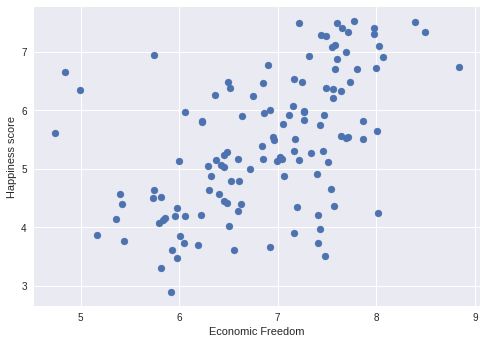

In [0]:
plt.scatter(final_data['Economic Freedom'], final_data['Happiness score'])
plt.xlabel('Economic Freedom')
plt.ylabel('Happiness score')